Epoch 0: loss=0.7036, acc=0.5000
Epoch 500: loss=0.7361, acc=0.5000
Epoch 1000: loss=0.7779, acc=0.5000
Epoch 1500: loss=0.8003, acc=0.5000
Epoch 2000: loss=0.8130, acc=0.5000
Epoch 2500: loss=0.8203, acc=0.5000
Epoch 3000: loss=0.8247, acc=0.5000
Epoch 3500: loss=0.8273, acc=0.5000
Epoch 4000: loss=0.8289, acc=0.5000
Epoch 4500: loss=0.8298, acc=0.5000

Predicciones: [0 0 0 0]
Verdaderas: [0 1 1 0]


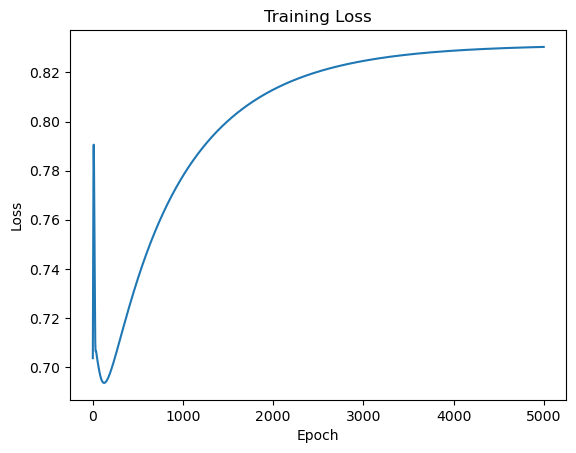

In [ ]:
# En 01_test_xor.ipynb
import sys
sys.path.append('../')

import numpy as np
from src.neural_network import NeuralNetwork
from src.optimizers import Adam
from src.utils import one_hot_encode

X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y = np.array([0, 1, 1, 0])
y_oh = one_hot_encode(y, 2)

architecture = [
    (2, None),
    (4, 'sigmoid'),
    (2, 'softmax')
]

model = NeuralNetwork(architecture)
optimizer = Adam(learning_rate=0.1)

# Entrenamiento manual con debug
losses = []
for epoch in range(5000):
    # Forward
    y_pred = model.forward(X)
    loss = model.compute_loss(y_pred, y_oh)
    losses.append(loss)
    
    # Backward
    model.backward(y_oh)
    
    # Update
    params = model.get_params()
    grads = model.get_grads()
    optimizer.update(params, grads)
    
    if epoch % 500 == 0:
        acc = np.mean(np.argmax(y_pred, axis=1) == y)
        print(f"Epoch {epoch}: loss={loss:.4f}, acc={acc:.4f}")

# Resultado final
y_pred_final = model.forward(X)
print("\nPredicciones:", np.argmax(y_pred_final, axis=1))
print("Verdaderas:", y)

import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()